In [0]:
import pandas as pd
import seaborn as sns

In [10]:
df = pd.read_csv('heart.csv') #reading the dataset from https://www.kaggle.com/ronitf/heart-disease-uci
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
# Checking for NaNs
print(df.shape)
print(df.isnull().sum())

(303, 14)
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


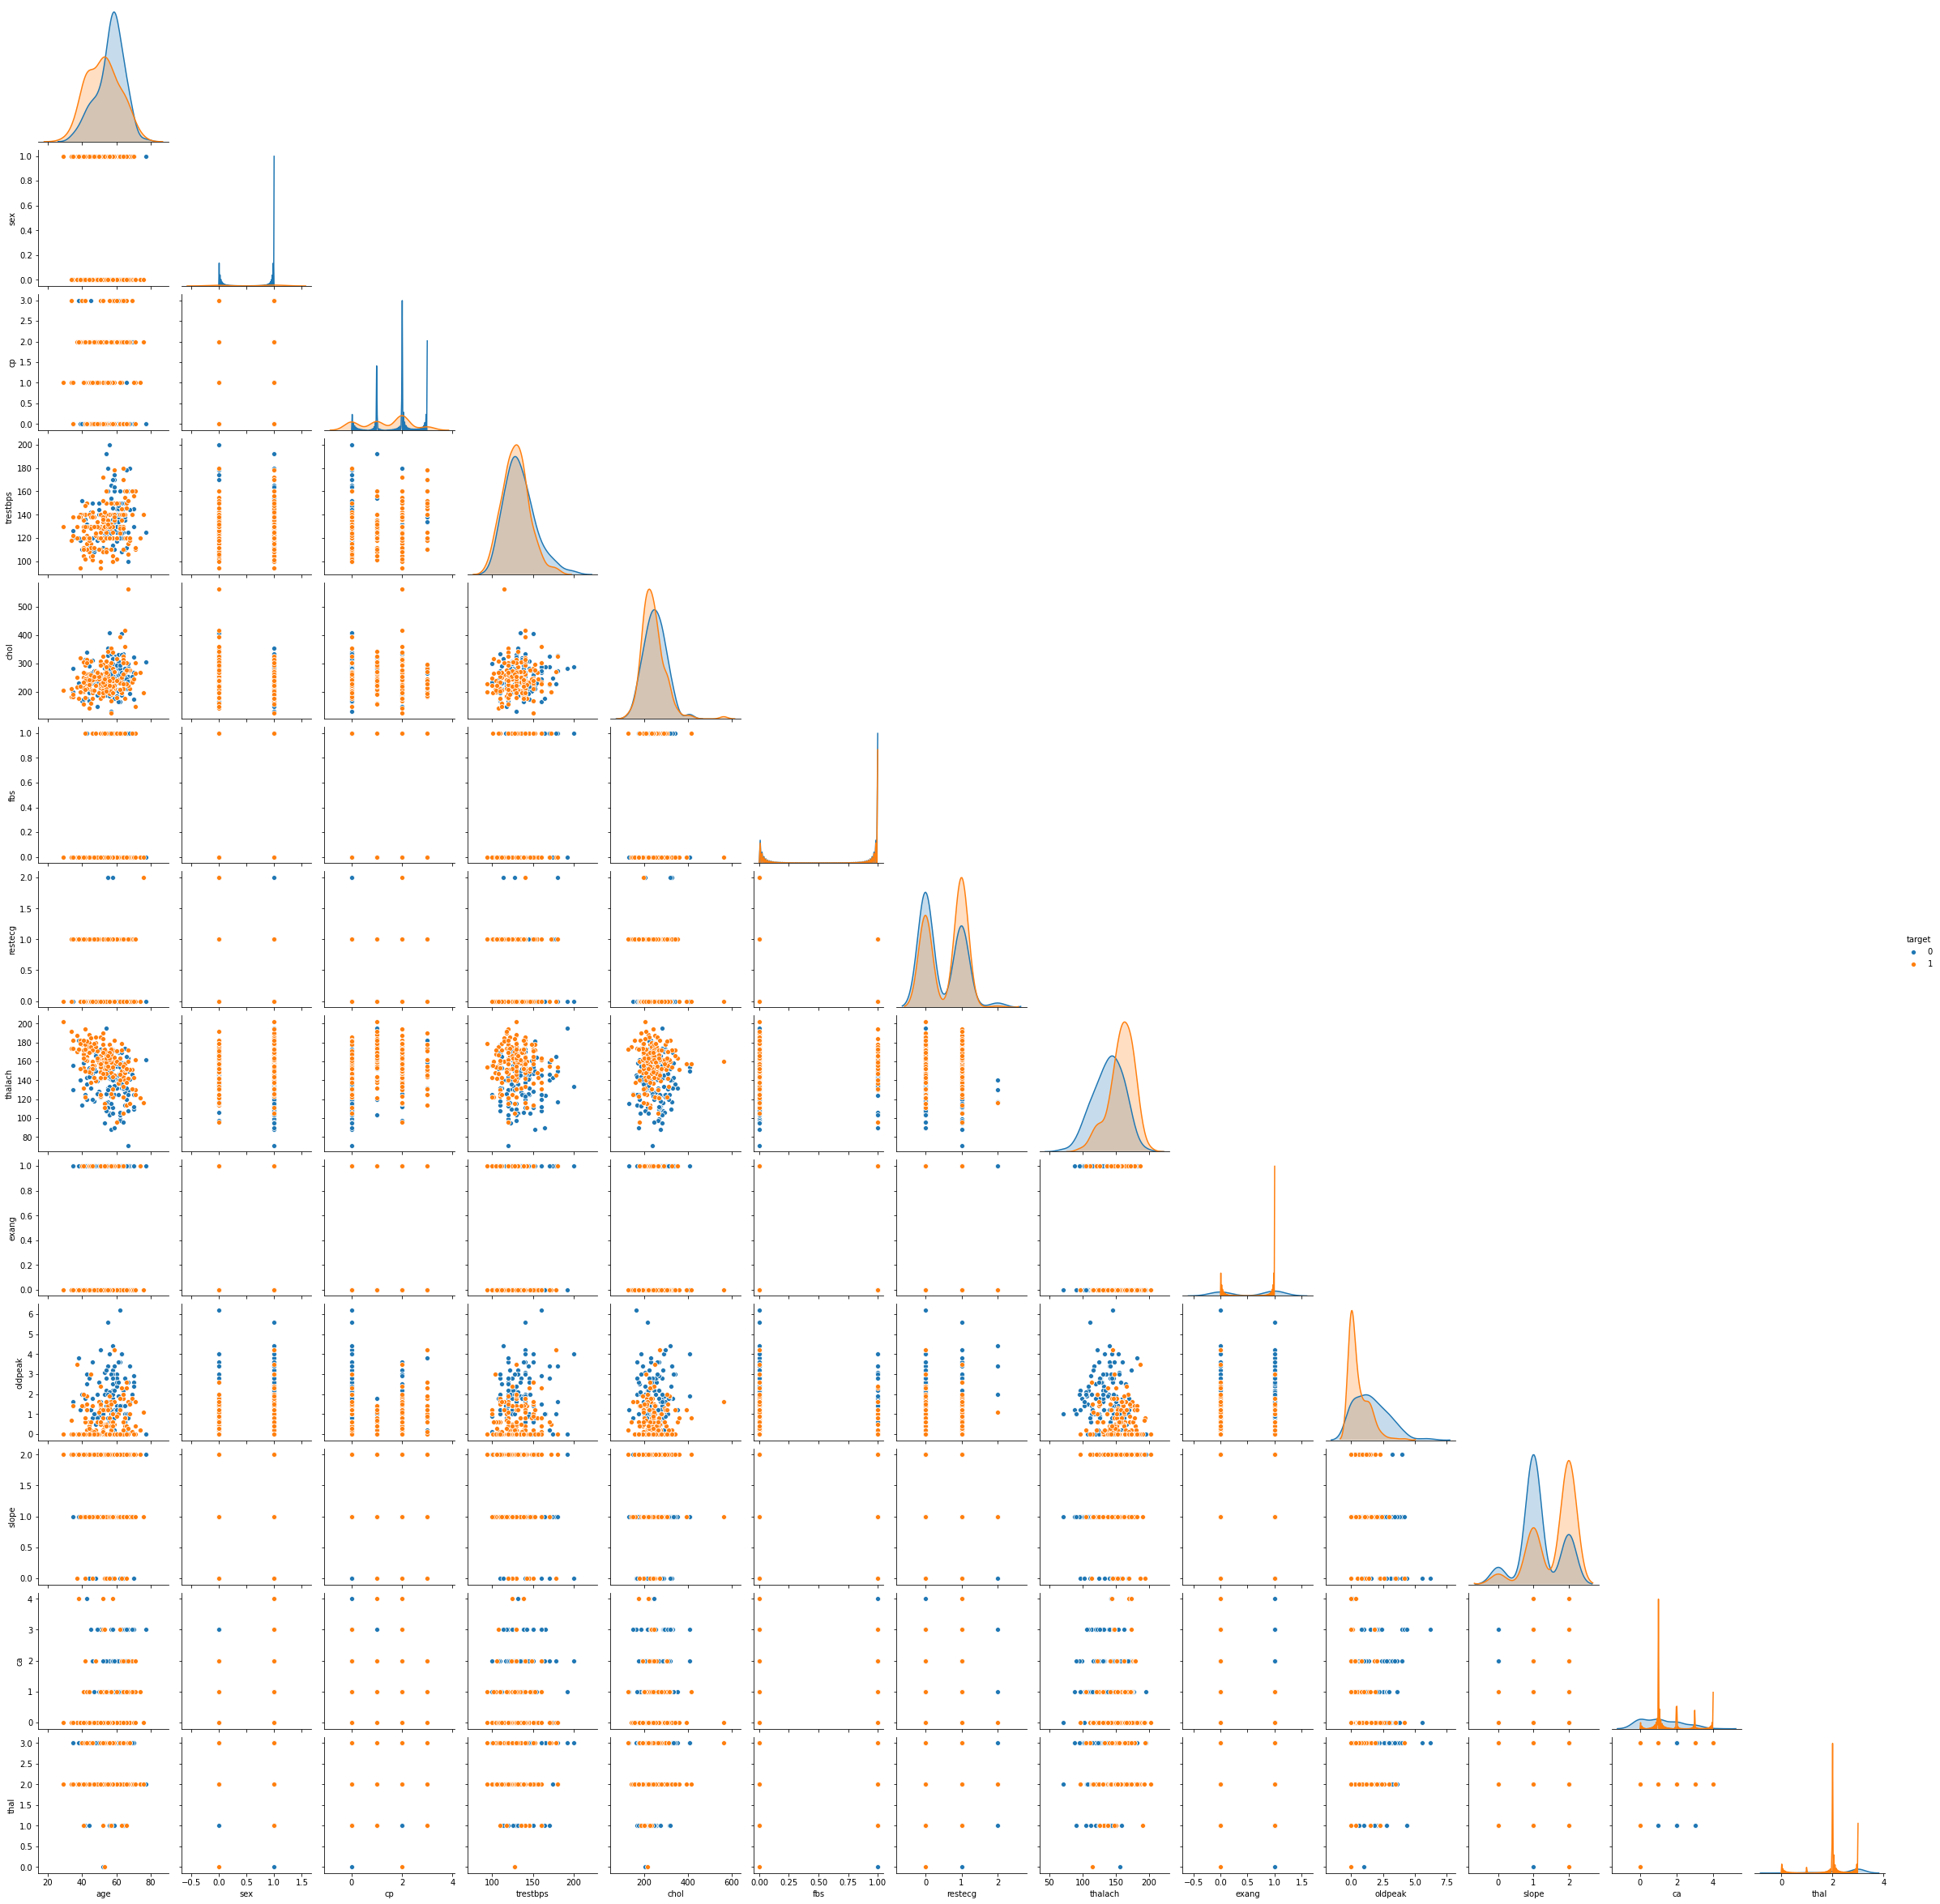

In [12]:
sns.pairplot(df,hue='target',corner=True) #using pairplot to quickly see relations between features

In [13]:
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
heart_features = df.drop(labels='target',axis=1) # preparing inputs
heart_labels = df['target'] #preparing targets
heart_labels.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

In [0]:
def print_results(results): # Function for printing results from GridSearchCV
    print('BEST PARAMS: {}\\n'.format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [15]:
svc = SVC() # Support vector Classifier
params_svc= { # Preparing the parameter combinations to test with GridSearchCV
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.01, 0.1, 1, 10]
}
cv_svc = GridSearchCV(svc,params_svc,cv=5) # preparing the cv object with 5 cross validations
cv_svc.fit(heart_features, heart_labels) # fitting the model
print_results(cv_svc) # Using print_result function to print results

BEST PARAMS: {'C': 1, 'kernel': 'linear'}\n
0.792 (+/-0.083) for {'C': 0.01, 'kernel': 'linear'}
0.545 (+/-0.009) for {'C': 0.01, 'kernel': 'rbf'}
0.545 (+/-0.009) for {'C': 0.01, 'kernel': 'poly'}
0.818 (+/-0.098) for {'C': 0.1, 'kernel': 'linear'}
0.545 (+/-0.009) for {'C': 0.1, 'kernel': 'rbf'}
0.558 (+/-0.023) for {'C': 0.1, 'kernel': 'poly'}
0.828 (+/-0.086) for {'C': 1, 'kernel': 'linear'}
0.643 (+/-0.116) for {'C': 1, 'kernel': 'rbf'}
0.653 (+/-0.084) for {'C': 1, 'kernel': 'poly'}
0.818 (+/-0.125) for {'C': 10, 'kernel': 'linear'}
0.7 (+/-0.04) for {'C': 10, 'kernel': 'rbf'}
0.7 (+/-0.07) for {'C': 10, 'kernel': 'poly'}


In [16]:
cv_svc.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
joblib.dump(cv_svc.best_estimator_,'SVM_model.pkl') # Saving the best model with joblib

['SVM_model.pkl']

In [0]:
from sklearn.ensemble import GradientBoostingClassifier


In [19]:
gbc = GradientBoostingClassifier()
params_gbc ={ # Preparing the parameter combinations to test with GridSearchCV
    'learning_rate':[0.01,0.1,1,10],
    'n_estimators': [100,150,300],
    'max_depth': [3,9,18]
}
cv_gbc = GridSearchCV(gbc,params_gbc,cv=5) # creating the cv object with 5 cross validations
cv_gbc.fit(heart_features,heart_labels) # fitting the model
print_results(cv_gbc) # Using print_result function to print results

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}\n
0.808 (+/-0.095) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
0.802 (+/-0.068) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 150}
0.812 (+/-0.109) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
0.759 (+/-0.116) for {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 100}
0.762 (+/-0.109) for {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 150}
0.772 (+/-0.108) for {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 300}
0.755 (+/-0.119) for {'learning_rate': 0.01, 'max_depth': 18, 'n_estimators': 100}
0.749 (+/-0.13) for {'learning_rate': 0.01, 'max_depth': 18, 'n_estimators': 150}
0.759 (+/-0.129) for {'learning_rate': 0.01, 'max_depth': 18, 'n_estimators': 300}
0.808 (+/-0.082) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.805 (+/-0.099) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
0.812 (+/-0.087) for {

In [20]:
cv_gbc.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [21]:
joblib.dump(cv_gbc.best_estimator_,'GraidentBoosting_model.pkl') # Saving the best model with joblib

['GraidentBoosting_model.pkl']